<a href="https://colab.research.google.com/github/sns-sakib/polynomial-regression-using-neural-network/blob/main/keras_functional_and_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2 as cv


In [17]:
input1 = keras.layers.Input(shape=(28, 28, 1),name="input_1")

input2 = keras.layers.Input(shape=(28, 28, 1),name="input_2")

convx = keras.layers.Conv2D(32, 3, activation="relu", name="conv_x")(input1)
relux = keras.layers.ReLU( name='relu_x')(convx)
convy = keras.layers.Conv2D(32, 3, activation="relu", name="conv_y")(input2)
reluy = keras.layers.ReLU( name='relu_y')(convy)
add = keras.layers.concatenate([convx, convy], name='add')

conv2d = keras.layers.Conv2D(28, 3, activation="relu", name="conv_z")(add)
reluz = keras.layers.ReLU( name='relu_z')(conv2d)


model = keras.Model(inputs = [input1, input2], outputs = reluz, name="myModel")
model.summary()




Model: "myModel"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv_x (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 conv_y (Conv2D)                (None, 26, 26, 32)   320         ['input_2[0][0]']                
                                                                                            

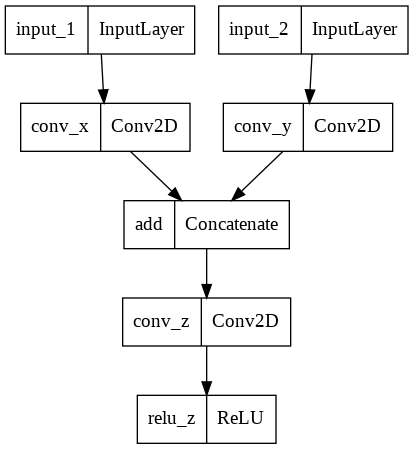

In [14]:
keras.utils.plot_model(model, "multi_input_model.png", show_shapes=False)


In [29]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss="binary_crossentropy",
   
)


In [30]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [43]:
# Dummy input data
num_words = 1000
input1_data = np.random.randint(num_words, size=(1280, 28, 28, 1))
input2_data = np.random.randint(num_words, size=(1280, 28, 28, 1))

# Dummy target data
targets = np.random.randint(num_words, size=((1280, 24, 24, 28)))


In [41]:
len(input1_data)

1280

In [32]:

model.fit(
    {"input_1": input1_data, "input_2": input2_data},
    targets,
    epochs=2,
    batch_size=32,
)

Epoch 1/2
40/40 [==============================] - 3s 71ms/step - loss: -5707.9795
Epoch 2/2
40/40 [==============================] - 3s 70ms/step - loss: -6508.7227


In [52]:
import matplotlib.pyplot as plt
test = np.random.randint(num_words, size=(1, 28, 28, 1))
test2 = np.random.randint(num_words, size=(1, 28, 28, 1))
print(model.predict([test, test2]))

[[[[285.79507  198.1042   159.29935  ... 216.16846  251.06097
    378.23398 ]
   [291.87497  223.4031   213.6584   ... 222.84569  304.37323
    311.2363  ]
   [239.16435  250.2637   228.4117   ... 161.39497  222.51428
    303.56998 ]
   ...
   [118.268    141.04488  181.39682  ... 283.03726  232.42065
    273.67456 ]
   [201.91513  152.75652  102.13447  ... 117.760506 193.03185
    282.21503 ]
   [185.18045  219.95033  228.87363  ... 154.0613   369.58066
    194.32062 ]]

  [[223.43495  185.6767   284.6804   ... 166.59584  199.35435
    296.51257 ]
   [337.07883  176.38745  167.55618  ... 241.03093  276.96695
    310.56165 ]
   [273.87817  186.20006  132.50203  ... 178.50931  120.75019
    289.2625  ]
   ...
   [283.5758   187.78043  131.80975  ... 193.99748  182.40636
    256.7955  ]
   [189.06279  232.22887  221.83359  ... 262.82123  230.28717
    232.40616 ]
   [228.25804  259.6345   170.50215  ... 131.78937  269.8112
    291.07028 ]]

  [[207.61044  253.33495  248.37471  ... 225.15

In [112]:
import numpy as np
import PIL

im = PIL.Image.open("/content/line_segment.png").convert("L")

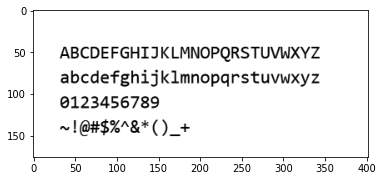

In [115]:
im_np = np.array(im)
#im_np = im_np[:, :, :3]
#im_np = np.asarray(im.getdata()).reshape(im.size)
plt.imshow(im_np, cmap = 'gray')

In [116]:
im_np.shape

(176, 402)

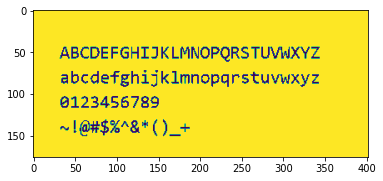

In [117]:
def to_binary(img, lower, upper):
    return (lower < img) & (img < upper)

bin_im = 1.0*(im_np > 150)
plt.imshow(bin_im, cmap='gray')

In [118]:
bin_im

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [119]:
rot_im = np.rot90(bin_im)

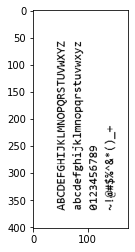

In [120]:
plt.imshow(rot_im, cmap='gray')

In [135]:
im_sum = np.sum(rot_im, axis = 0)

In [136]:
im_sum

array([402., 402., 402., 402., 402., 402., 402., 402., 402., 402., 402.,
       402., 402., 402., 402., 402., 402., 402., 402., 402., 402., 402.,
       402., 402., 402., 402., 402., 402., 402., 402., 402., 402., 402.,
       402., 402., 402., 402., 402., 402., 402., 402., 402., 402., 402.,
       258., 237., 304., 315., 317., 312., 284., 279., 308., 309., 311.,
       305., 250., 273., 400., 399., 397., 399., 402., 402., 402., 402.,
       402., 402., 402., 402., 402., 402., 396., 377., 379., 388., 387.,
       248., 221., 301., 316., 303., 302., 321., 317., 283., 250., 306.,
       390., 383., 379., 391., 402., 402., 402., 402., 402., 402., 402.,
       402., 402., 402., 402., 369., 340., 354., 371., 375., 369., 356.,
       350., 361., 367., 368., 375., 334., 341., 402., 402., 402., 402.,
       402., 402., 402., 402., 402., 402., 402., 402., 402., 402., 399.,
       380., 367., 369., 367., 370., 355., 358., 367., 355., 345., 353.,
       365., 362., 359., 373., 395., 394., 380., 38

In [137]:
index = [i for i in range(len(im_sum)) if im_sum[i] < 402] 

In [138]:
im_sum[:100]

array([402., 402., 402., 402., 402., 402., 402., 402., 402., 402., 402.,
       402., 402., 402., 402., 402., 402., 402., 402., 402., 402., 402.,
       402., 402., 402., 402., 402., 402., 402., 402., 402., 402., 402.,
       402., 402., 402., 402., 402., 402., 402., 402., 402., 402., 402.,
       258., 237., 304., 315., 317., 312., 284., 279., 308., 309., 311.,
       305., 250., 273., 400., 399., 397., 399., 402., 402., 402., 402.,
       402., 402., 402., 402., 402., 402., 396., 377., 379., 388., 387.,
       248., 221., 301., 316., 303., 302., 321., 317., 283., 250., 306.,
       390., 383., 379., 391., 402., 402., 402., 402., 402., 402., 402.,
       402.])

In [139]:
index

[44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150]

(array([  3.,   3.,  16.,  19.,  31.,  34.,  23.,  65.,  53., 155.]),
 array([132. , 136.4, 140.8, 145.2, 149.6, 154. , 158.4, 162.8, 167.2,
        171.6, 176. ]),
 <a list of 10 Patch objects>)

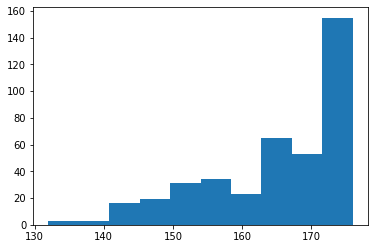

In [125]:
plt.hist(im_sum)

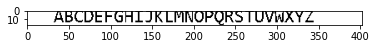

In [147]:
line1 = bin_im[44:61]
plt.imshow(bin_im[44:61], cmap = 'gray')

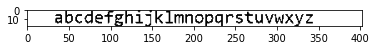

In [148]:
line2 = bin_im[72:91]
plt.imshow(bin_im[72:91], cmap = 'gray')

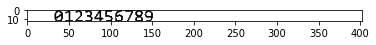

In [149]:
line3 = bin_im[103:116]
plt.imshow(bin_im[103:116], cmap = 'gray')

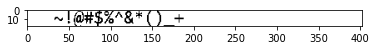

In [150]:
line4 = bin_im[131:150]
plt.imshow(bin_im[131:150], cmap = 'gray')

In [158]:
rot_line1 = np.rot90(line1)
line1_sum = np.sum(rot_line1, axis = 1)
line1_sum

array([17., 17., 17., 17., 17., 17., 17., 17., 17., 17., 17., 17., 17.,
       17., 17., 17., 17., 17., 17., 17., 17., 17., 17., 17., 17., 17.,
       17., 17., 17., 17., 17., 17., 17., 17., 17., 17., 17., 17., 17.,
       17., 17., 17., 17., 17., 17., 17., 17., 17., 17., 17., 17., 17.,
       17., 17., 17., 17., 17., 17., 14., 12., 11., 10., 11., 10., 11.,
       10., 12., 13., 17., 17., 15., 13., 13., 13.,  9.,  9., 14., 13.,
       13., 14., 16., 17., 14., 11., 10., 10., 11., 12.,  9., 10., 10.,
       13., 16., 17.,  4.,  6., 14., 12., 12., 14., 13., 14., 10.,  3.,
       13., 16., 13., 11., 11., 11., 13., 14., 11., 11., 11., 12., 15.,
       17.,  7.,  4., 14., 15., 15., 15., 15., 14.,  4.,  5., 17., 17.,
       15., 15., 15., 15.,  3.,  3., 15., 15., 15., 15., 17., 17., 17.,
       13.,  9., 11., 11., 11., 11., 10., 10., 12., 17., 17., 16., 11.,
        7.,  9., 12., 13., 13., 13.,  3.,  3., 17., 17.,  7.,  5., 10.,
       10., 10., 11., 13., 11.,  9.,  7., 12., 17., 15., 11., 11

In [159]:
index_line1 = [i for i in range(len(line1_sum)) if line1_sum[i] < 17]
index_line1 

[58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 239,
 240,
 241,
 242,
 243,
 244,
 245,
 246,
 247,
 252,
 253,
 254,
 255,
 256,
 257,
 258,
 259,
 263,
 264,


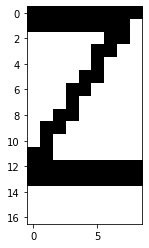

In [166]:
plt.imshow(np.rot90(np.rot90(np.rot90(rot_line1[58:67]))), cmap='gray')

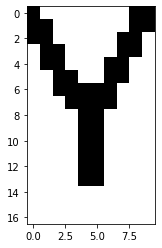

In [168]:
plt.imshow(np.rot90(np.rot90(np.rot90(rot_line1[70:80]))), cmap='gray')

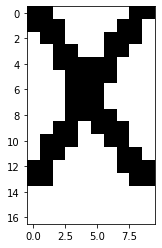

In [169]:
plt.imshow(np.rot90(np.rot90(np.rot90(rot_line1[82:92]))), cmap='gray')